# Introduction
## IE423 - Group 5

In the second part of the project, we are responsible for analyzing the image that we were given and finding out out-of-control pixel values considering the each row and each column of the matrix. The image we worked on has a pixel size of 400x400 and we converted it to greyscale. 


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="whitegrid")
from tqdm import tqdm

## Part 1

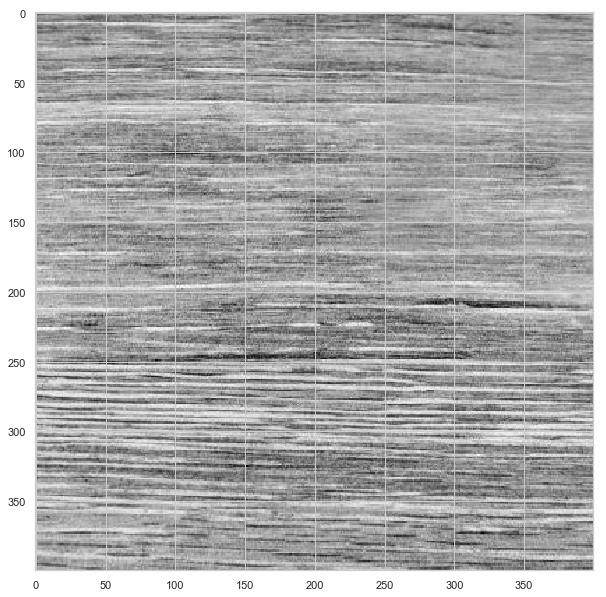

In [2]:
to_grey=lambda x: cv2.cvtColor(x,cv2.COLOR_BGR2GRAY)
img=cv2.imread("group_5.jpg")
img=to_grey(img)
plt.figure(figsize=(10,15))
plt.imshow(img,cmap="gray")

### a) For each row of our image, we constructed an appropriate chart for monitoring the mean and the variance. For the mean and the variance, X-bar chart and S chart are used respectively. The reason for using S chart is that sample size is greater than 10 which is the maximum sample size for using R chart. 


In [3]:
# calc of x_bar_bar and s_bar
x_bars=[]
s_s=[]
img_controlled=[]
for idx in range(400):
    row=img[idx]
    x_bar=row.mean()
    x_bars.append(x_bar)
    s_=np.std(row,ddof=1)
    s_s.append(s_)
    x_ucl=x_bar+2*s_
    x_lcl=x_bar-2*s_
    row=np.where((row>x_lcl)&(row<x_ucl),row,0)
    img_controlled.append(row)
img_controlled=np.array(img_controlled)

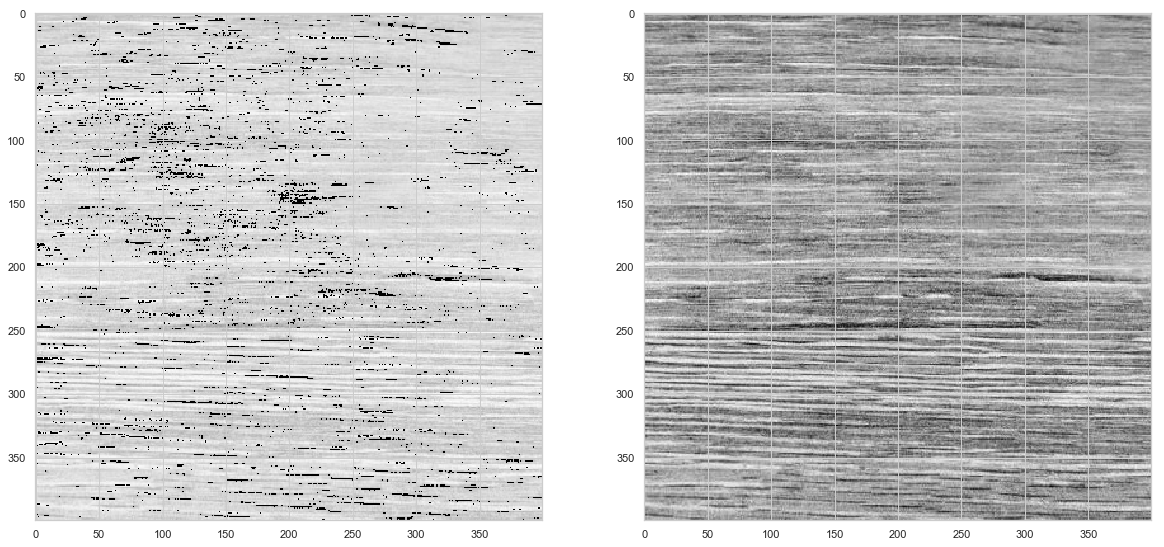

In [4]:
#applying control
fig,ax=plt.subplots(ncols=2,figsize=(20,15))
ax[0].imshow(img_controlled,cmap="gray")
ax[1].imshow(img,cmap="gray")

The grain texture of the image displays horizontal tendency. However, the grains are not perfectly horizontal and the slight transverse deviation from the defined rows causes high standard deviation in some of the samples. On the other hand, some of the horizontal grain texture display a better match with the row. These rows generate extremely small standard deviation because of the pixel color distribution. Because there are rows having sample standard deviation values either extremely high or extremely low, a high percentage of the sample rows are found to be out-of-control according to S chart constructed from the sample data.

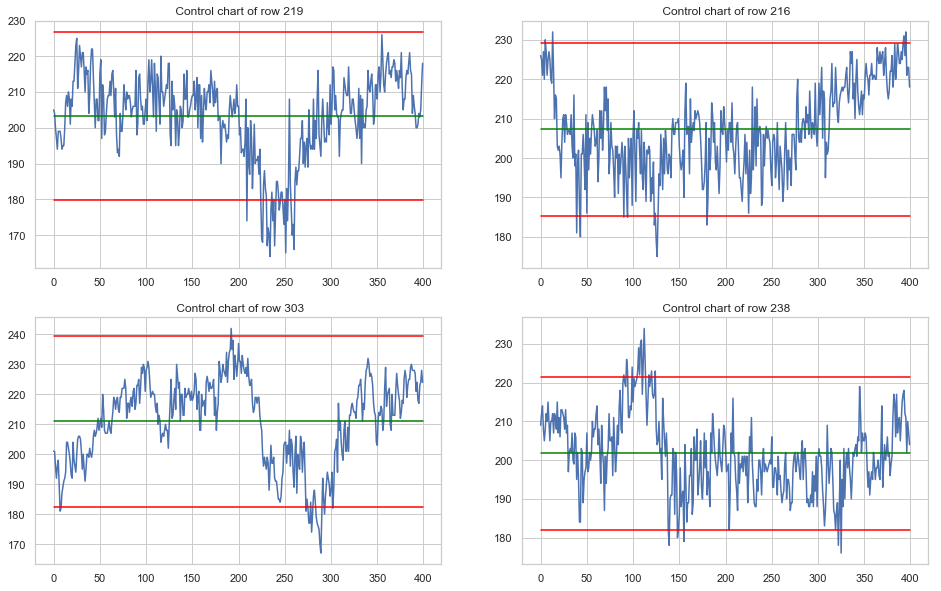

In [5]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(16,10))
idxs=np.random.choice(list(range(len(x_bars))),4).reshape((2,2))
for i in range(2):
    for j in range(2):
        ax[i,j].plot(img[idxs[i,j]])
        ax[i,j].plot([x_bars[idxs[i,j]]+2*s_s[idxs[i,j]]]*400,color="red")
        ax[i,j].plot([x_bars[idxs[i,j]]-2*s_s[idxs[i,j]]]*400,color="red")
        ax[i,j].plot([x_bars[idxs[i,j]]]*400,color="green")
        ax[i,j].set_title(" Control chart of row {}".format(idxs[i,j]))

The horizontal grain texture causes the mean value of sample rows to be different from each other. Some of the rows are close to white while some of them are close to black due to the grain texture. X-bar values among samples deviate significantly from the overall sample mean, causing many out-of-control samples.


### b) For each column of our image, we constructed an appropriate chart for monitoring the mean and the variance. For the mean and the variance, X-bar chart and S chart are used respectively. The reason for using S chart is that sample size is greater than 10 which is the maximum sample size for using R chart. 

In [6]:
# calc of x_bar_bar and s_bar
x_bars=[]
s_s=[]
img_controlled=[]
for idx in range(400):
    row=img[:,idx]
    x_bar=row.mean()
    x_bars.append(x_bar)
    s_=np.std(row,ddof=1)
    s_s.append(s_)
    x_ucl=x_bar+2*s_
    x_lcl=x_bar-2*s_
    row=np.where((row>x_lcl)&(row<x_ucl),row,0)
    img_controlled.append(row)
img_controlled=np.array(img_controlled).T

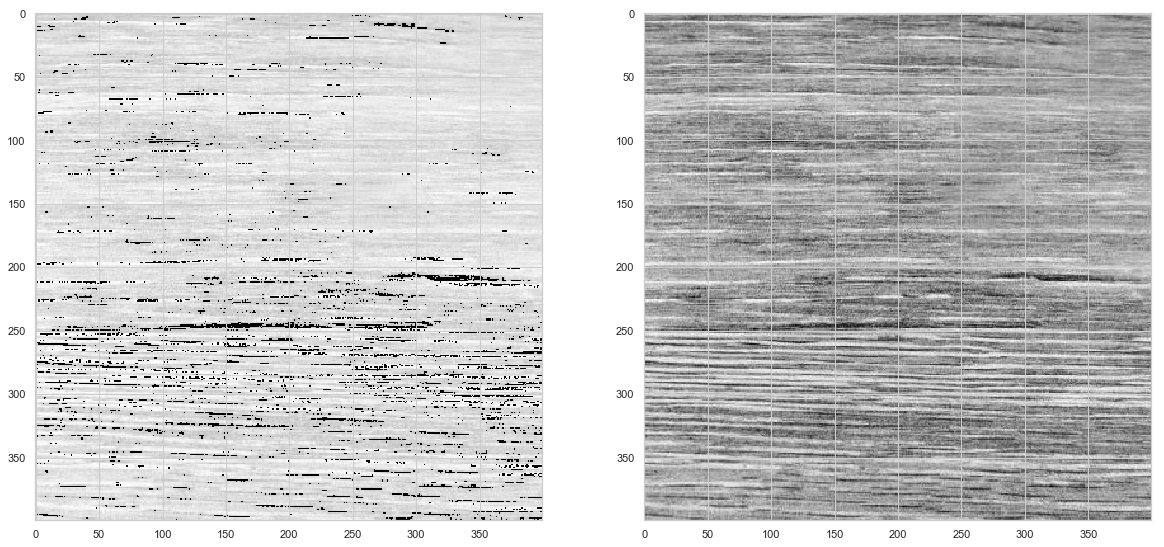

In [7]:
#applying control
fig,ax=plt.subplots(ncols=2,figsize=(20,15))
ax[0].imshow(img_controlled,cmap="gray")
ax[1].imshow(img,cmap="gray")

Since the grain texture of the image displays horizontal tendency; there are various pixel values within each column. Therefore the standard deviation of the columns are high but the values do not differ much from column to column. This explains why the central line of the S chart is high and high percentage of the values stand between control limits in contrast to results that we obtained in part a. 

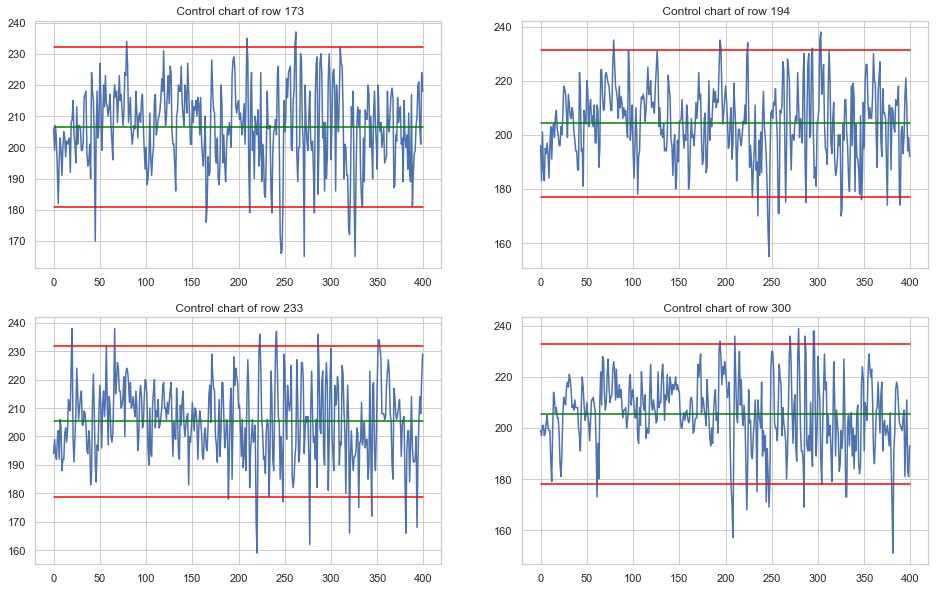

In [8]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(16,10))
idxs=np.random.choice(list(range(len(x_bars))),4).reshape((2,2))
for i in range(2):
    for j in range(2):
        ax[i,j].plot(img[:,idxs[i,j]])
        ax[i,j].plot([x_bars[idxs[i,j]]+2*s_s[idxs[i,j]]]*400,color="red")
        ax[i,j].plot([x_bars[idxs[i,j]]-2*s_s[idxs[i,j]]]*400,color="red")
        ax[i,j].plot([x_bars[idxs[i,j]]]*400,color="green")
        ax[i,j].set_title(" Control chart of row {}".format(idxs[i,j]))

Even though the variety within columns are high for every single column, the mean values are similar for each column. So, we found less out-of-control situations from X-bar chart. Because there are less out-of-control samples in part b, the number of black points in part b is less than in part a. Additionally, the value of the central line of the X-bar chart is the same for both part a and part b. This is due to the fact that central line implies the overall sample mean. 

## Part 2

Image shape: (400, 400)


c:\python\python36\lib\site-packages\sklearn\feature_extraction\image.py:287: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  indexing_strides = arr[slices].strides


Patches shape: (122500, 51, 51)


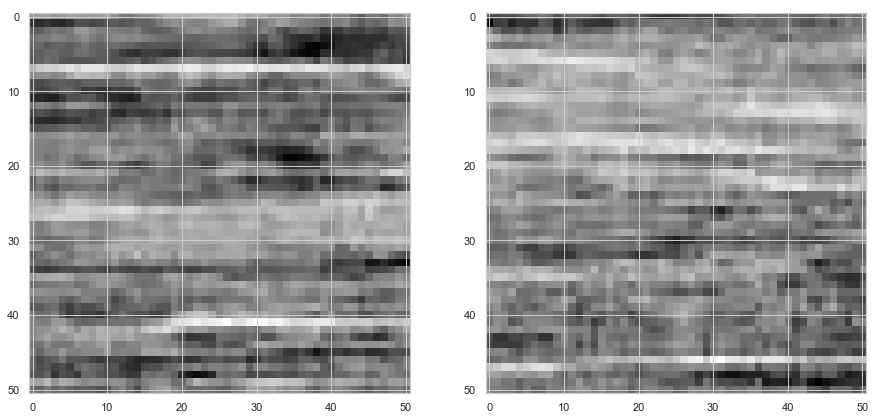

In [9]:
from sklearn.feature_extraction import image
print('Image shape: {}'.format(img.shape))
patches = image.extract_patches_2d(img, (51, 51))
print('Patches shape: {}'.format(patches.shape))
fig,ax=plt.subplots(1,2,figsize=(15,10))
ax[0].imshow(patches[1],cmap="gray")
ax[1].imshow(patches[22000],cmap="gray");

In [10]:
import pandas as pd
patches=patches.reshape((122500,2601))
patches=pd.DataFrame(patches)
patches.head()

,0,1,2,3,4,5,6,7,8,9,...,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600
0,210,210,213,214,211,212,215,213,213,212,...,206,208,205,202,199,195,199,198,203,204
1,210,213,214,211,212,215,213,213,212,213,...,208,205,202,199,195,199,198,203,204,199
2,213,214,211,212,215,213,213,212,213,214,...,205,202,199,195,199,198,203,204,199,195
3,214,211,212,215,213,213,212,213,214,210,...,202,199,195,199,198,203,204,199,195,196
4,211,212,215,213,213,212,213,214,210,204,...,199,195,199,198,203,204,199,195,196,197


In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(patches.drop(columns=[1300]),patches[1300])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
preds=model.predict(patches.drop(columns=[1300]))

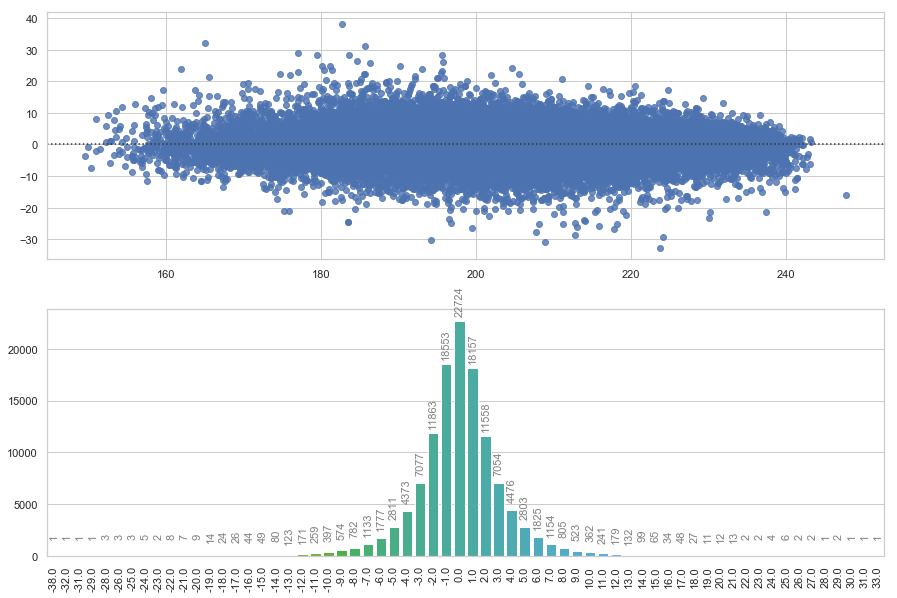

In [13]:
fig,ax=plt.subplots(nrows=2,figsize=(15,10))
sns.residplot(preds, patches[1300].values,ax=ax[0])
residuals=preds-patches[1300].values
vals,counts=np.unique(np.round(residuals),return_counts=True)
g=sns.barplot(vals,counts,ax=ax[1])
g.set_xticklabels(labels=vals,rotation=90)
for p in ax[1].patches:
             ax[1].annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', rotation=90, xytext=(0, 20),
                 textcoords='offset points')

In [14]:
from scipy.stats import norm
x_bar=residuals.mean()
s_=np.std(residuals,ddof=1)
ucl=x_bar+3*s_
lcl=x_bar-3*s_

In [15]:
ooc_pixels=np.where((residuals<lcl)|(residuals>ucl))[0]

In [16]:
img_flat=img.copy()[25:375,25:375].flatten()
img_flat[ooc_pixels]=0
img_flat=img_flat.reshape((350,350))

In part 1, we assumed that pixel values are independent of each other which causes autocorrelation not to be considered. Since our image has a horizontal texture, the pixel values on it are somehow related in each rows. In order to avoid from this problem, first we extracted the pacthes of images as size of 51x51. Then we constructed linear regression model to predict the central values of the each patch by using other pixels of that patch. For each patch, we compared the predicted values and the real values of the central pixels and we obtained a residual for each patch. Then, we plotted those residuals to control whether it is normally distributed or not. After finding that the residuals are normally distributed, we used 3σ control limits to detect the outlier residuals. The value of corresponding pixels having out-of-control residuals are changed to zero. 

When we took autocorrelation into account, we observed less out-of-control pixels which creates less black pixels. 

To be Noted: The left image is more white, that is because the matplotlib library makes the image normalized when cmap is specified.

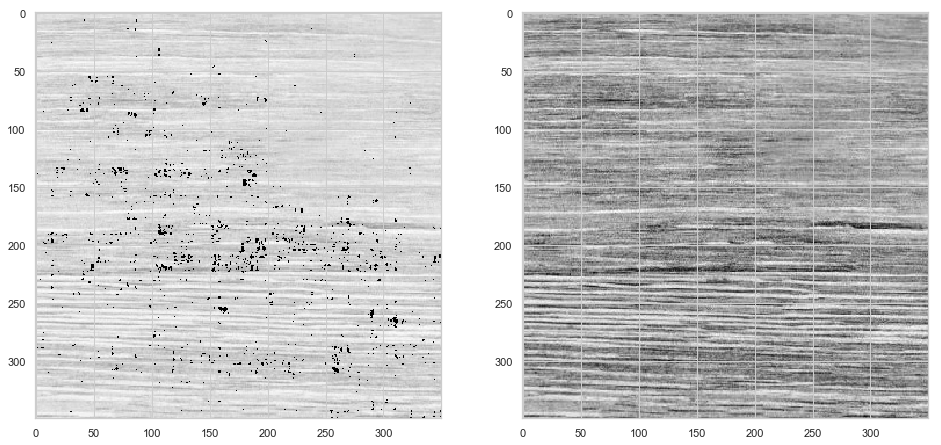

In [17]:
fig,ax=plt.subplots(ncols=2,figsize=(16,20))
ax[0].imshow(img_flat,cmap="gray")
ax[1].imshow(img[25:375,25:375],cmap="gray")

There are better ways to handle the problem of autocorrelation. While using regression, we should also consider the problem of multicollinearity. Multicollinearity refers to predictors that are correlated with other predictors [1]. In our case, these predictors are a pixel that is in the same grains. To deal with this problem, the Principal Component Analysis can be used to cut the number of predictors to a smaller set of uncorrelated components [2]. 


References

1)	https://blog.minitab.com/blog/understanding-statistics/handling-multicollinearity-in-regression-analysis

2)	https://blog.minitab.com/blog/understanding-statistics/handling-multicollinearity-in-regression-analysis

